In [1]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [47]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_LIST_PATH)
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_LIST_PATH)

In [3]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [4]:
grid_df['clk_list'] = grid_df['clk_list'].map(lambda x: list(map(str, x)))

In [5]:
sentences = grid_df['clk_list'].values.tolist()

In [6]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [55]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt')
        self.epoch += 1

In [56]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 50,
          'min_count': 1,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': 25,
          'callbacks': [callback()]}

In [59]:
# ### Restore Model
# #####################################
save_path = '/home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt'
model = Word2Vec.load(save_path)

2020-05-21 07:36:44,238 : INFO : loading Word2Vec object from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt
2020-05-21 07:36:58,237 : INFO : loading wv recursively from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.wv.* with mmap=None
2020-05-21 07:36:58,238 : INFO : loading vectors from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.wv.vectors.npy with mmap=None
2020-05-21 07:36:58,910 : INFO : setting ignored attribute vectors_norm to None
2020-05-21 07:36:58,911 : INFO : loading vocabulary recursively from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.vocabulary.* with mmap=None
2020-05-21 07:36:58,912 : INFO : loading trainables recursively from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.trainables.* with mmap=None
2020-05-21 07:36:58,912 : INFO : loading syn1neg from /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.trainables.syn1neg.npy with mmap=None
2020-05-21 

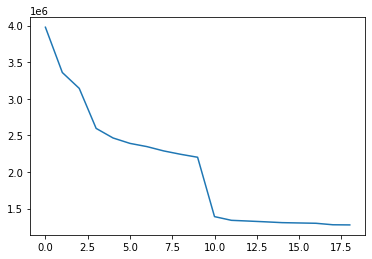

2020-05-21 07:36:06,630 : INFO : saving Word2Vec object under /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt, separately None
2020-05-21 07:36:06,631 : INFO : storing np array 'vectors' to /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.wv.vectors.npy


loss list:  [6449011.0, 10426918.0, 13786255.0, 16928866.0, 19524720.0, 21989756.0, 24380856.0, 26728090.0, 29015958.0, 31257950.0, 33459572.0, 34850200.0, 36190164.0, 37520156.0, 38839736.0, 40147972.0, 41451884.0, 42751464.0, 44030768.0, 45307992.0]
Loss after epoch 19: 45307992.0


2020-05-21 07:36:09,109 : INFO : not storing attribute vectors_norm
2020-05-21 07:36:09,111 : INFO : storing np array 'syn1neg' to /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt.trainables.syn1neg.npy
2020-05-21 07:36:11,644 : INFO : not storing attribute cum_table
2020-05-21 07:36:24,560 : INFO : saved /home/huangzc/competition/tencent/model_ckpt/gensim_w2v/model.txt
2020-05-21 07:36:25,584 : INFO : EPOCH 21 - PROGRESS: at 1.52% examples, 910776 words/s, in_qsize 46, out_qsize 3
2020-05-21 07:36:26,675 : INFO : EPOCH 21 - PROGRESS: at 3.15% examples, 904591 words/s, in_qsize 42, out_qsize 7
2020-05-21 07:36:27,676 : INFO : EPOCH 21 - PROGRESS: at 4.51% examples, 876635 words/s, in_qsize 41, out_qsize 8
2020-05-21 07:36:28,759 : INFO : EPOCH 21 - PROGRESS: at 6.08% examples, 874937 words/s, in_qsize 40, out_qsize 9
2020-05-21 07:36:29,768 : INFO : EPOCH 21 - PROGRESS: at 7.46% examples, 864656 words/s, in_qsize 44, out_qsize 5
2020-05-21 07:36:30,828 : INFO : EPOCH 2

KeyboardInterrupt: 

In [58]:
model = Word2Vec(**params)

In [60]:
tr_ad_df = pd.read_pickle(TRAIN_DIR+AD_PATH)
ts_ad_df = pd.read_pickle(TEST_DIR+AD_PATH)

In [63]:
vocab = pd.concat([tr_ad_df, ts_ad_df], axis=0)['creative_id'].unique().tolist()

In [61]:
vocab_size = max(vocab) + 1 ### padding 0 need add 1

In [62]:
emb_matrix = np.zeros((vocab_size, 50))

In [65]:
for word in vocab:
    emb_matrix[word] = model.wv[str(word)]

/home/huangzc/anaconda3/envs/competition-py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [67]:
np.save('/home/huangzc/competition/tencent/data/train_preliminary/gensim_dict.npy', emb_matrix)